In [2]:
!pip install scanpy anndata matplotlib numpy pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.1/284.1 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 116.1 MB/s eta 0:00:00


In [3]:
# Test environment setup for Scanpy project

import sys
import platform

print("Python version:", sys.version)
print("Platform:", platform.platform())

# Test key packages
try:
    import scanpy as sc
    print("Scanpy version:", sc.__version__)
except Exception as e:
    print("Scanpy import failed:", e)

try:
    import anndata
    print("AnnData version:", anndata.__version__)
except Exception as e:
    print("AnnData import failed:", e)

try:
    import matplotlib
    print("Matplotlib version:", matplotlib.__version__)
except Exception as e:
    print("Matplotlib import failed:", e)

try:
    import numpy as np
    print("NumPy version:", np.__version__)
except Exception as e:
    print("NumPy import failed:", e)

Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Platform: Linux-6.6.105+-x86_64-with-glibc2.35
Scanpy version: 1.11.5
AnnData version: 0.12.6
Matplotlib version: 3.10.0
NumPy version: 2.0.2


/tmp/ipython-input-184515610.py:12: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('scanpy')` instead
  print("Scanpy version:", sc.__version__)
/tmp/ipython-input-184515610.py:18: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
  print("AnnData version:", anndata.__version__)


In [4]:
import scanpy as sc

# Load the preprocessed PBMC dataset
adata = sc.datasets.pbmc3k_processed()
adata

  0%|          | 0.00/23.5M [00:00<?, ?B/s]

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    var: 'n_cells'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [7]:
import scanpy as sc

# Install igraph and leidenalg if not already installed, as they are dependencies for leiden clustering
!pip install python-igraph leidenalg

# Just to be safe, recompute neighbors (optional but fine)
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

resolutions = [0.2, 0.5, 2.0]

for res in resolutions:
    key = f"leiden_{str(res).replace('.', '_')}"
    sc.tl.leiden(adata, resolution=res, key_added=key)
    print(f"Done: {key}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 33.8 MB/s eta 0:00:00


/tmp/ipython-input-1433632917.py:13: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=res, key_added=key)


Done: leiden_0_2
Done: leiden_0_5
Done: leiden_2_0


In [11]:
import pandas as pd

resolutions = [0.2, 0.5, 2.0]

cluster_tables = []

for res in resolutions:
    key = f"leiden_{str(res).replace('.', '_')}"
    counts = adata.obs[key].value_counts().sort_index()

    df = counts.reset_index()
    df.columns = ["cluster", "n_cells"]
    df["resolution"] = res
    cluster_tables.append(df)

cluster_counts_df = pd.concat(cluster_tables, ignore_index=True)
cluster_counts_df
cluster_counts_df.to_csv("cluster_counts_by_resolution.csv", index=False)

print(cluster_counts_df.to_markdown(index=False))


|   cluster |   n_cells |   resolution |
|----------:|----------:|-------------:|
|         0 |      1452 |          0.2 |
|         1 |       669 |          0.2 |
|         2 |       341 |          0.2 |
|         3 |       163 |          0.2 |
|         4 |        13 |          0.2 |
|         0 |      1175 |          0.5 |
|         1 |       638 |          0.5 |
|         2 |       440 |          0.5 |
|         3 |       341 |          0.5 |
|         4 |        31 |          0.5 |
|         5 |        13 |          0.5 |
|         0 |       388 |          2   |
|         1 |       340 |          2   |
|         2 |       238 |          2   |
|         3 |       184 |          2   |
|         4 |       170 |          2   |
|         5 |       169 |          2   |
|         6 |       156 |          2   |
|         7 |       138 |          2   |
|         8 |       121 |          2   |
|         9 |       114 |          2   |
|        10 |        89 |          2   |
|        11 |   

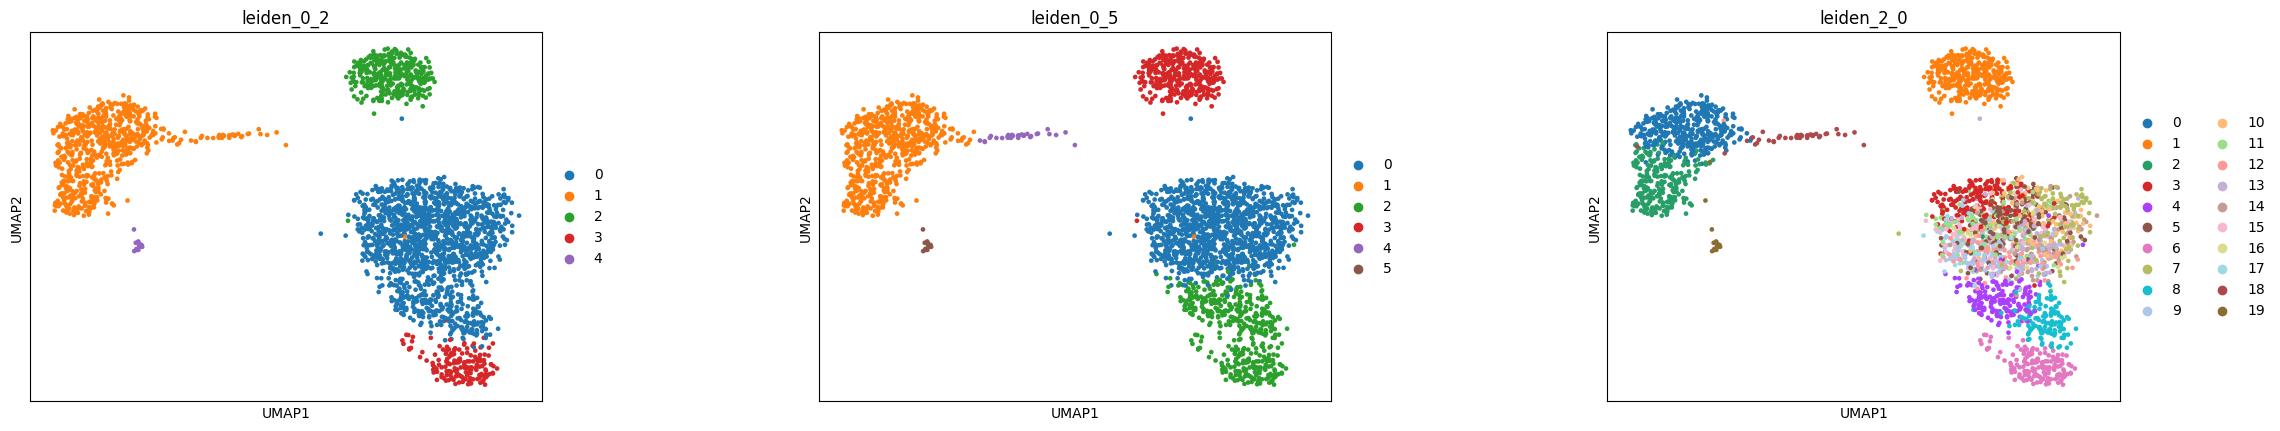

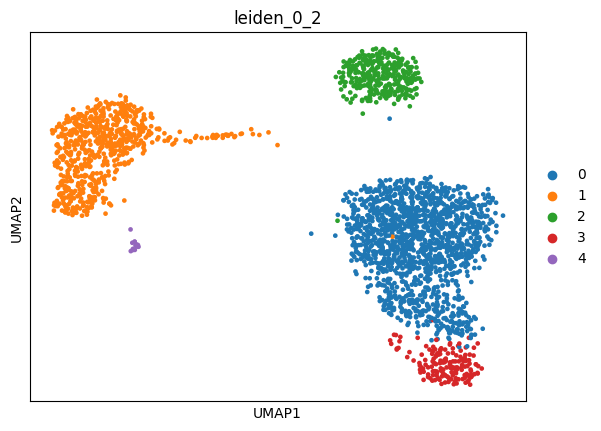

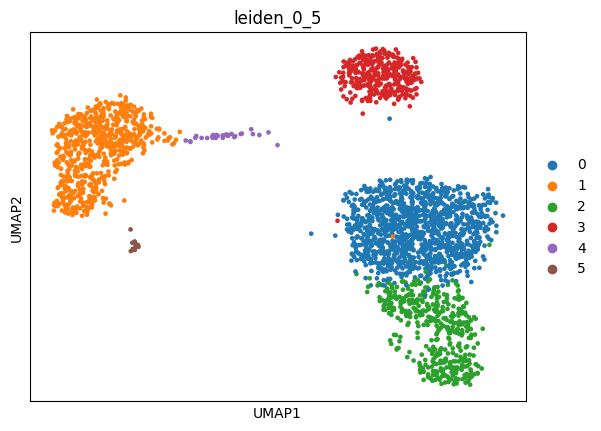

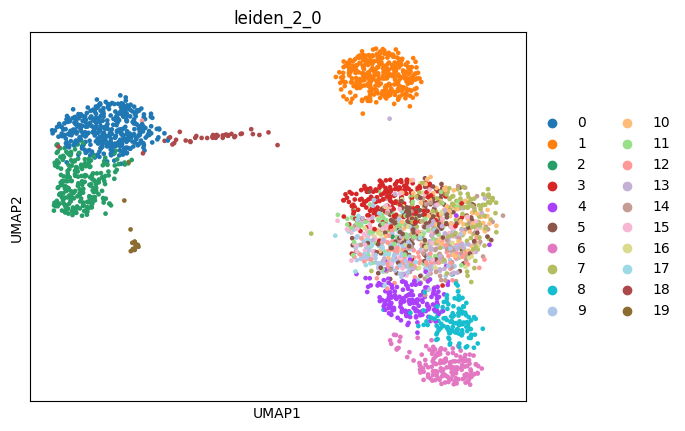

In [9]:
sc.pl.umap(
    adata,
    color=["leiden_0_2", "leiden_0_5", "leiden_2_0"],
    wspace=0.4
)
sc.pl.umap(adata, color="leiden_0_2", save="_leiden_0_2.png")
sc.pl.umap(adata, color="leiden_0_5", save="_leiden_0_5.png")
sc.pl.umap(adata, color="leiden_2_0", save="_leiden_2_0.png")


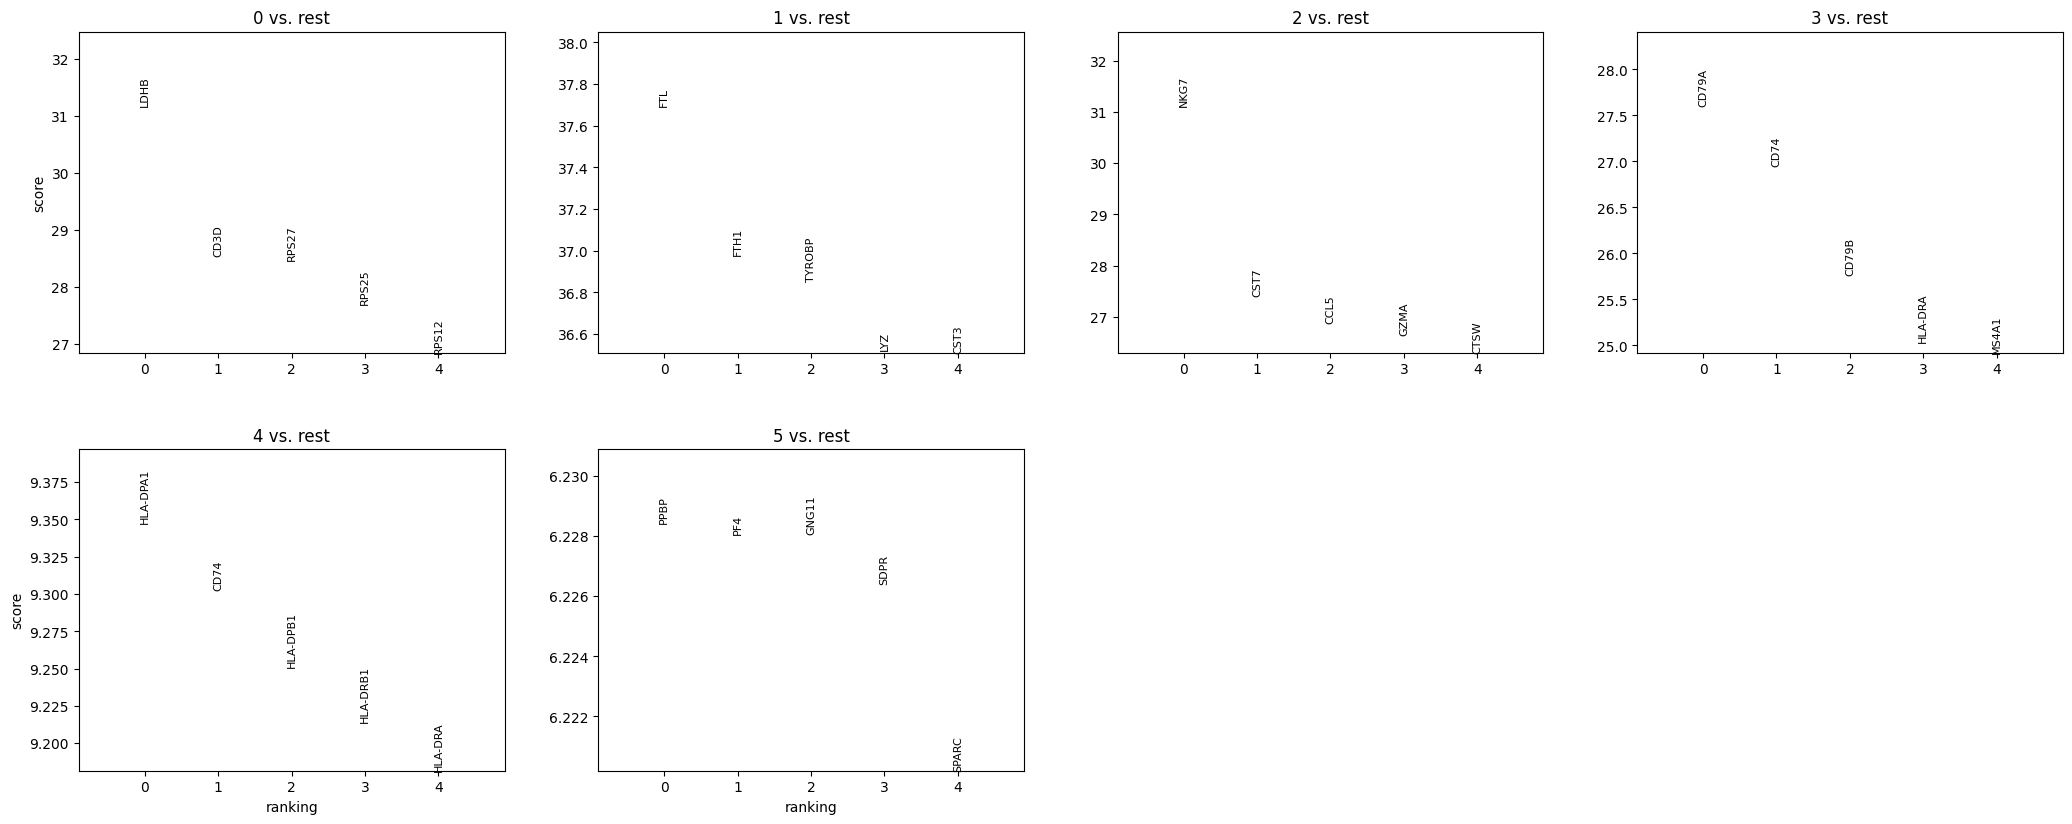

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,0,LDHB,31.180445,2.256809,1.961996e-213,2.690682e-209
1,0,CD3D,28.537813,2.558926,3.979302e-179,1.091443e-175
2,0,RPS27,28.472418,1.037308,2.572579e-178,5.880059e-175
3,0,RPS25,27.692072,1.122793,8.699091e-169,1.491242e-165
4,0,RPS12,26.842165,1.039071,1.041207e-158,1.298101e-155


In [12]:
sc.tl.rank_genes_groups(
    adata,
    groupby="leiden_0_5",
    method="wilcoxon"
)

sc.pl.rank_genes_groups(adata, n_genes=5, sharey=False)
marker_df = sc.get.rank_genes_groups_df(adata, group=None)
marker_df.to_csv("marker_genes_leiden_0_5.csv", index=False)
marker_df.head()


In [15]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import pandas as pd

clustering_scores = []

for res in [0.2, 0.5, 2.0]:
    key = f"leiden_{str(res).replace('.', '_')}"
    labels_leiden = adata.obs[key].astype(str)
    labels_louvain = adata.obs["louvain"].astype(str)

    ari = adjusted_rand_score(labels_louvain, labels_leiden)
    nmi = normalized_mutual_info_score(labels_louvain, labels_leiden)

    clustering_scores.append({
        "resolution": res,
        "ARI_vs_louvain": ari,
        "NMI_vs_louvain": nmi
    })

    print(f"\nResolution {res}:")
    print(f"  ARI = {ari:.4f}")
    print(f"  NMI = {nmi:.4f}")

clustering_scores_df = pd.DataFrame(clustering_scores)
clustering_scores_df.to_csv("cluster_separability_scores.csv", index=False)
clustering_scores_df



Resolution 0.2:
  ARI = 0.7047
  NMI = 0.8067

Resolution 0.5:
  ARI = 0.8605
  NMI = 0.8546

Resolution 2.0:
  ARI = 0.3404
  NMI = 0.6628


,resolution,ARI_vs_louvain,NMI_vs_louvain
0,0.2,0.704693,0.806689
1,0.5,0.860543,0.854608
2,2.0,0.340375,0.662808
